**Importing the** **Dependencies**

In [ ]:
import numpy as np
import pandas as pd

Data Collectin and Preprocessing

In [ ]:
aqi_data = pd.read_csv('/content/AirQualityUCI.csv', sep=';', decimal =',')
aqi_data = aqi_data.iloc[:, :-2]
aqi_data=aqi_data.dropna()


counting number of missing values

In [ ]:
aqi_data.isin([-200]).sum(axis=0)
aqi_data= aqi_data.replace(-200, np.NaN )

replacing missing values

In [ ]:
aqi_data = aqi_data.fillna(aqi_data.select_dtypes(include=np.number).mean()) # Calculate the mean of only numeric columns

In [ ]:
date_info = pd.to_datetime(aqi_data['Date'], format='%d/%m/%Y') # Specify the correct format for the date column (day/month/year)

In [ ]:
time_info = aqi_data['Time']
time_info = time_info.apply(lambda x:x.replace('.',':'))

In [ ]:
date_time = pd.concat([date_info, time_info], axis=1)
date_time['ds'] = date_time['Date'].astype(str)+ ' ' + date_time['Time'].astype(str)

In [ ]:
data = pd.DataFrame()
data['ds'] = pd.to_datetime(date_time['ds'])
data['y'] = aqi_data['AH']

In [ ]:
!pip install prophet
from prophet import Prophet

Training the prophet model

In [ ]:
model = Prophet()
model.fit(data)

future = model.make_future_dataframe(periods=365, freq='H')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59bd3lah/qyr1cgna.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59bd3lah/xz62yed5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2566', 'data', 'file=/tmp/tmp59bd3lah/qyr1cgna.json', 'init=/tmp/tmp59bd3lah/xz62yed5.json', 'output', 'file=/tmp/tmp59bd3lah/prophet_modelw945vfop/prophet_model-20241026080001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:00:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:00:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version,

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9717,2005-04-19 15:00:00,0.787854,0.439159,1.114722
9718,2005-04-19 16:00:00,0.794713,0.463460,1.141549
9719,2005-04-19 17:00:00,0.808727,0.488146,1.141857
9720,2005-04-19 18:00:00,0.827109,0.470284,1.145575
9721,2005-04-19 19:00:00,0.845515,0.513220,1.186463


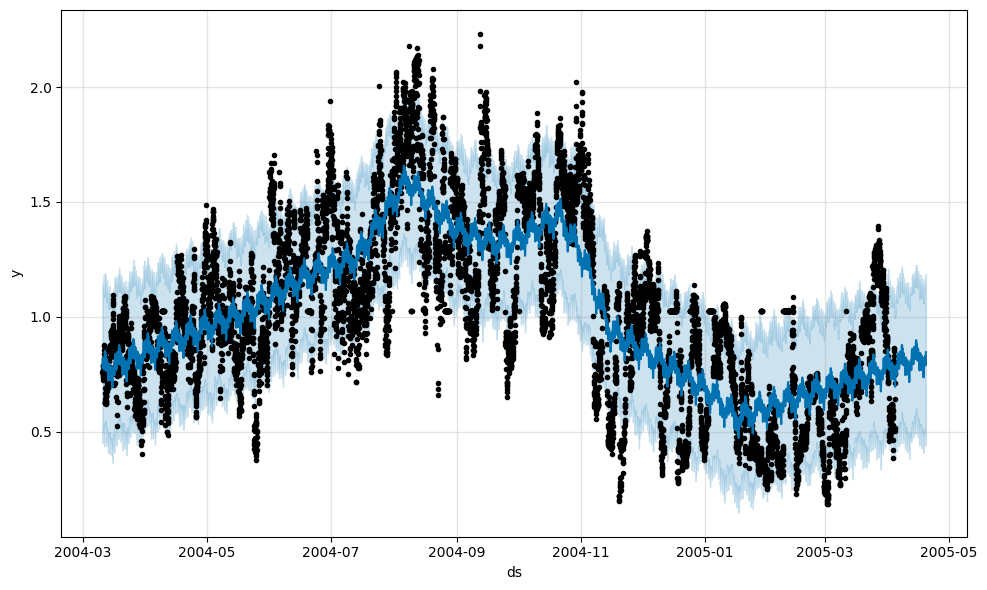

In [ ]:
fig1 = model.plot(forecast)

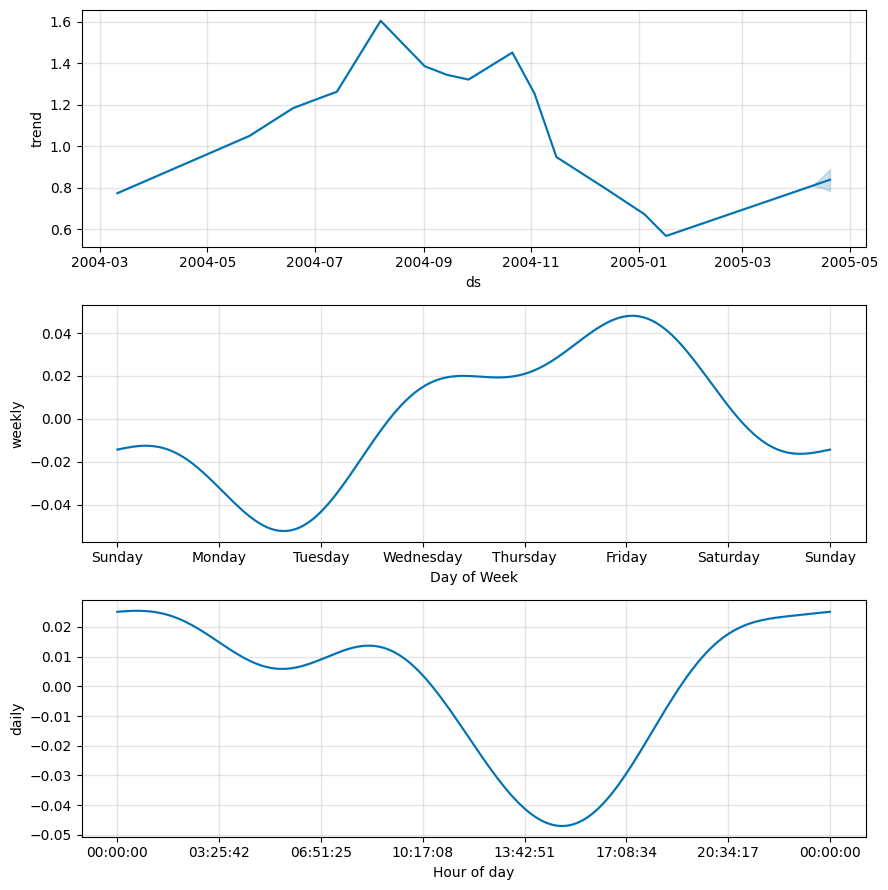

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
# prompt: to calculate accuracy

# Assuming 'y' is the actual value column in your 'data' dataframe
# and 'yhat' is the predicted value column in your 'forecast' dataframe

# Align the actual and predicted values based on the timestamp 'ds'
merged_data = pd.merge(data, forecast[['ds', 'yhat']], on='ds', how='inner')

# Calculate the accuracy based on your desired metric
# Example: Mean Absolute Percentage Error (MAPE)
def mape(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

accuracy = mape(merged_data['y'], merged_data['yhat'])

print(f"Accuracy (MAPE): {accuracy:.2f}%")

# You can choose other metrics like RMSE, MAE etc. depending on your needs.

Accuracy (MAPE): 25.42%


In [ ]:
model = Prophet(changepoint_prior_scale=0.05)  # Adjust the value
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59bd3lah/if7ztu6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59bd3lah/5lrn0338.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39261', 'data', 'file=/tmp/tmp59bd3lah/if7ztu6s.json', 'init=/tmp/tmp59bd3lah/5lrn0338.json', 'output', 'file=/tmp/tmp59bd3lah/prophet_model1wsg144e/prophet_model-20241026080401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model = Prophet(seasonality_prior_scale=10)  # Adjust the value
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59bd3lah/dp2dwnmm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59bd3lah/7xcv2y0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73076', 'data', 'file=/tmp/tmp59bd3lah/dp2dwnmm.json', 'init=/tmp/tmp59bd3lah/7xcv2y0l.json', 'output', 'file=/tmp/tmp59bd3lah/prophet_model3cum6jm2/prophet_model-20241026080419.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
model = Prophet(holidays_prior_scale=15)  # Adjust the value
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59bd3lah/r39vz4ta.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59bd3lah/utakldh4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47929', 'data', 'file=/tmp/tmp59bd3lah/r39vz4ta.json', 'init=/tmp/tmp59bd3lah/utakldh4.json', 'output', 'file=/tmp/tmp59bd3lah/prophet_modelxhmfa24z/prophet_model-20241026080439.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:04:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:04:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Assuming 'extra_data' is a DataFrame with the additional data and a 'ds' column
model = Prophet()
model.add_regressor('temperature')  # Add regressor name
model.fit(data.merge(extra_data[['ds', 'temperature']], on='ds'))

NameError: name 'extra_data' is not defined

In [ ]:
data['y_log'] = np.log(data['y'])
   model = Prophet()
   model.fit(data[['ds', 'y_log']].rename(columns={'y_log': 'y'}))  # Rename for Prophet
   forecast = model.predict(future)
   forecast['yhat'] = np.exp(forecast['yhat'])  # Reverse transformation

In [ ]:
from prophet.diagnostics import cross_validation
   df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')